In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The simplest utility that this package provides is the `vsf_props` function.

The following snippet shows a calculation equivalent to the following function:

$$
\langle|\delta {\bf v}|^n\rangle(\ell) = 
    \frac{\sum_i \sum_{j\neq i} W_\ell(|{\bf r}_i-{\bf r}_j|) |{\bf v}({\bf r}_i) - {\bf v}({\bf r}_j)|^n }{\sum_i\sum_{j\neq i} W_\ell(|{\bf r}_i-{\bf r}_j|)}
$$

where $W_\ell(|{\bf r}_i-{\bf r}_j|)$ evaluates to 1 when $|{\bf r}_i-{\bf r}_j|$ falls within the $\ell$ bin and is 0 otherwise.

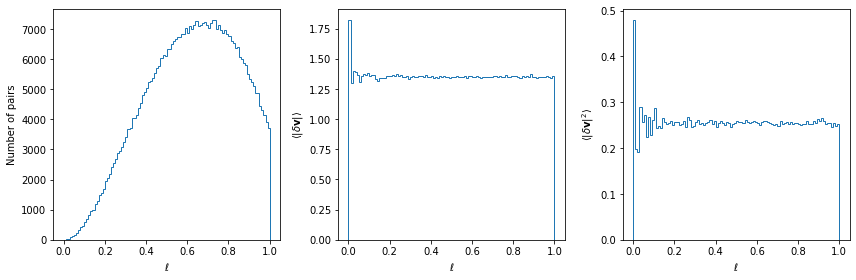

In [2]:

# generate some random positions and velocities:
generator = np.random.RandomState(seed = 156)
pos, vel = generator.rand(3,1000), generator.rand(3,1000)*2 - 1.0

from pyvsf import vsf_props

# separation bins
dist_bin_edges = np.arange(101.0)/100

# stat_kw_pairs can technically accept multiple values
# - this function returns a list where the ith entry 
#   corresponds to a dictionary which holds data for 
#   the ith entry of stat_kw_pairs
result_dict = vsf_props(pos_a = pos, pos_b = None,
                        vel_a = vel, vel_b = None,
                        dist_bin_edges = dist_bin_edges,
                        stat_kw_pairs = [('variance', {})],
                        nproc = 1)[0]

def plot_binned_data(ax, bin_edges, values, type = 'step',
                     **kwargs):
    return ax.hist(bin_edges[:-1], bins = bin_edges,
                   weights = values, histtype = 'step',
                   **kwargs)

fig, ax_arr = plt.subplots(1,3, figsize = (12,4), sharex=True)

plot_binned_data(ax_arr[0], dist_bin_edges, result_dict['counts'])
ax_arr[0].set_ylabel('Number of pairs')
plot_binned_data(ax_arr[1], dist_bin_edges, result_dict['mean'])
ax_arr[1].set_ylabel(r'$\langle|\delta{\bf v}|\rangle$')
plot_binned_data(ax_arr[2], dist_bin_edges, result_dict['variance'])
ax_arr[2].set_ylabel(r'$\langle|\delta{\bf v}|^2\rangle$')

for ax in ax_arr:
    ax.set_xlabel(r'$\ell$')

fig.tight_layout()

You can also evaluate the equivalent of "cross-vsf" between 2 different collections of data. Suppose we have 2 separate collections of points (collection $a$ and collection $b$). This is equaivalent to:

$$
\langle|\delta {\bf v}|^n\rangle_{\rm cross}(\ell) = 
    \frac{\sum_i^{N_a} \sum_j^{N_b} W_\ell(|{\bf r}_{a,i}-{\bf r}_{b,j}|) |{\bf v}({\bf r}_{a,i}) - {\bf v}({\bf r}_{b,j})|^n }{\sum_i^{N_a} \sum_j^{N_b} W_\ell(|{\bf r}_{a,i}-{\bf r}_{b,j}|)}
$$

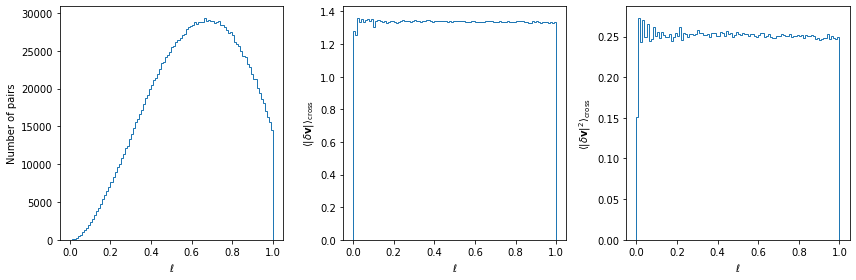

In [3]:
# generate the other points
generator_b = np.random.RandomState(seed = 5242)
pos_b, vel_b = generator_b.rand(3,2000), generator_b.rand(3,2000)*2 - 1.0

# stat_kw_pairs can technically accept multiple values
# - this function returns a list where the ith entry 
#   corresponds to a dictionary which holds data for 
#   the ith entry of stat_kw_pairs
result_dict = vsf_props(pos_a = pos, pos_b = pos_b,
                        vel_a = vel, vel_b = vel_b,
                        dist_bin_edges = dist_bin_edges,
                        stat_kw_pairs = [('variance', {})],
                        nproc = 1)[0]

fig, ax_arr = plt.subplots(1,3, figsize = (12,4), sharex=True)

plot_binned_data(ax_arr[0], dist_bin_edges, result_dict['counts'])
ax_arr[0].set_ylabel('Number of pairs')
plot_binned_data(ax_arr[1], dist_bin_edges, result_dict['mean'])
ax_arr[1].set_ylabel(r'$\langle|\delta{\bf v}|\rangle_{\rm cross}$')
plot_binned_data(ax_arr[2], dist_bin_edges, result_dict['variance'])
ax_arr[2].set_ylabel(r'$\langle|\delta{\bf v}|^2\rangle_{\rm cross}$')

for ax in ax_arr:
    ax.set_xlabel(r'$\ell$')

fig.tight_layout()

/home/mabruzzo/.pyenv/versions/3.7.2/envs/py37_new/lib/python3.7/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/mabruzzo/.config/yt/ytrc is deprecated in favor of /home/mabruzzo/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg
yt : [INFO     ] 2022-05-12 10:49:14,368 Parameters: current_time              = 6.5
yt : [INFO     ] 2022-05-12 10:49:14,369 Parameters: domain_dimensions         = [960 160 160]
yt : [INFO     ] 2022-05-12 10:49:14,370 Parameters: domain_left_edge          = [-60. -10. -10.]
yt : [INFO     ] 2022-05-12 10:49:14,372 Parameters: domain_right_edge         = [60. 10. 10.]
yt : [INFO     ] 2022-05-12 10:49:14,373 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 128/128 [00:00<00:00, 7373.08it/s]
yt : [INFO     ] 2022-05-12 10:49:17


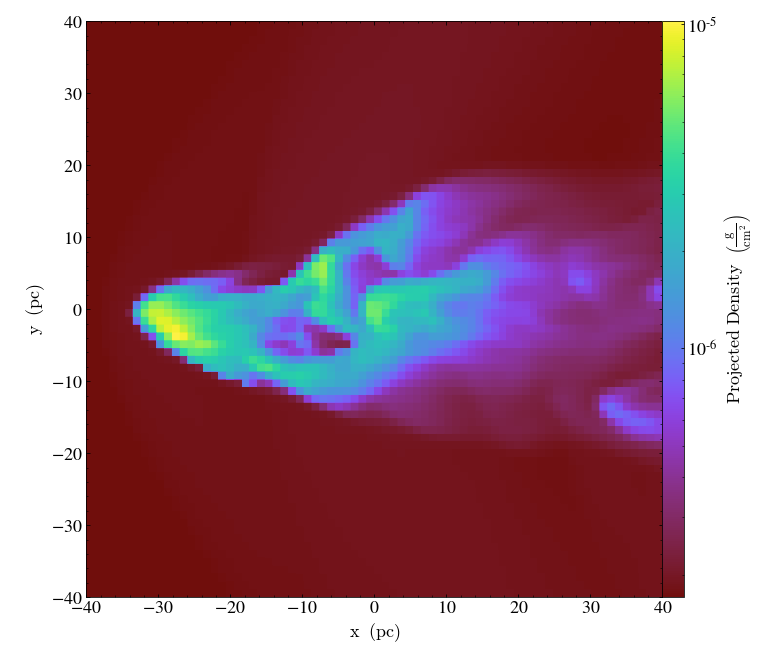

In [4]:
import yt
path = ('/home/mabruzzo/Dropbox/research/turb_cloud/cloud_runs/old/'
        'X1000_M1.5_HD_CDdftFloor_R8.647_logP3_Res8/cloud_06.5000/'
        'cloud_06.5000.block_list')
ds = yt.load(path)
proj = yt.ProjectionPlot(ds, "z", ("gas", "density"))
proj.set_width((80, "pc"))
proj

In [5]:
left_edge = yt.YTArray([-20,-20,-20], 'pc')
right_edge = left_edge * -1

region = ds.box(left_edge = left_edge, right_edge = right_edge)

pos = np.array([region["index", ii].to('pc').ndarray_view() \
                for ii in ['x', 'y', 'z']])
vel = np.array([region["gas", "velocity_" + ii].to('cm/s').ndarray_view() \
               for ii in ['x', 'y', 'z']])

CPU times: user 22.3 s, sys: 36.3 ms, total: 22.4 s
Wall time: 22.2 s


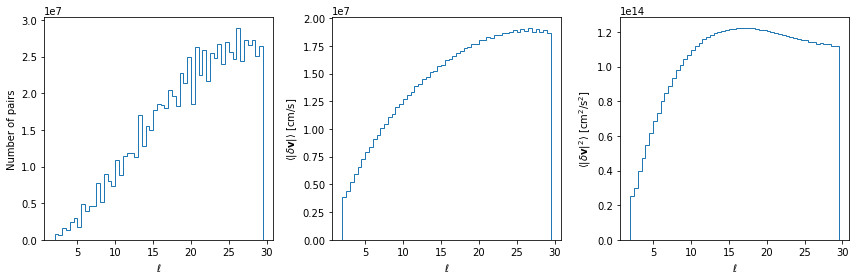

In [6]:
%%time

dist_bin_edges = np.arange(2,30, 0.5)

result_dict = vsf_props(pos_a = pos, pos_b = None,
                        vel_a = vel, vel_b = None,
                        dist_bin_edges = dist_bin_edges,
                        stat_kw_pairs = [('variance', {})],
                        nproc = 1)[0]


fig, ax_arr = plt.subplots(1,3, figsize = (12,4), sharex=True)

plot_binned_data(ax_arr[0], dist_bin_edges, result_dict['counts'])
ax_arr[0].set_ylabel('Number of pairs')
plot_binned_data(ax_arr[1], dist_bin_edges, result_dict['mean'])
ax_arr[1].set_ylabel(r'$\langle|\delta{\bf v}|\rangle$ [${\rm cm}/{\rm s}$]')
plot_binned_data(ax_arr[2], dist_bin_edges, result_dict['variance'])
ax_arr[2].set_ylabel(r'$\langle|\delta{\bf v}|^2\rangle$ [${\rm cm}^2/{\rm s}^2$]')

for ax in ax_arr:
    ax.set_xlabel(r'$\ell$')

fig.tight_layout()


The package also provides a function that handles a lot of this boiler-plate code for you ahead of time. It also makes optimizations when you limit the max separation that you are interested in

/home/mabruzzo/.pyenv/versions/3.7.2/envs/py37_new/lib/python3.7/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'x' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'enzoe'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("enzoe", "x")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
/home/mabruzzo/.pyenv/versions/3.7.2/envs/py37_new/lib/python3.7/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'y' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'enzoe'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "y")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
/home/mabruzzo/.pyenv/versions/3.7.2/envs/py37_new/lib/p

Driver: ( 0,  0,  0) -  subvol #0 of 8 ( 7 neigbors)
    perf-sec - all:     2.852568582    auto-sf:     0.286623754    auto-other:       1.898e-06    cross-sf:     2.285143118    cross-other:      1.6077e-05
    num points from subvol: [6859]
    total num points: [6859]
Driver: ( 1,  0,  0) -  subvol #1 of 8 ( 6 neigbors)
    perf-sec - all:     2.363728507    auto-sf:     0.282803722    auto-other:       1.915e-06    cross-sf:     1.849970651    cross-other:      1.1743e-05
    num points from subvol: [6859]
    total num points: [13718]
Driver: ( 0,  1,  0) -  subvol #2 of 8 ( 5 neigbors)
    perf-sec - all:     2.065733063    auto-sf:     0.279162949    auto-other:       2.144e-06    cross-sf:     1.583549287    cross-other:      1.0373e-05
    num points from subvol: [6859]
    total num points: [20577]
Driver: ( 1,  1,  0) -  subvol #3 of 8 ( 4 neigbors)
    perf-sec - all:     1.667694505    auto-sf:     0.276448352    auto-other:       2.077e-06    cross-sf:     1.226722448   

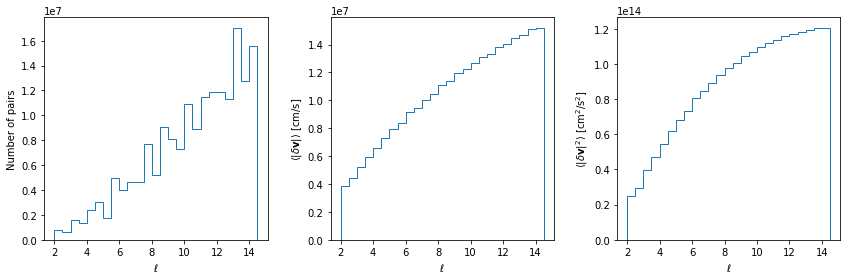

In [7]:
from pyvsf.small_dist_sf_props import (
    small_dist_sf_props,
    BoxSelector
)

geometric_selector = BoxSelector(
    left_edge = (-20,-20,-20),
    right_edge = (20,20,20),
    length_unit = 'pc'
)

new_dist_bin_edges = np.arange(2,15, 0.5)

tmp = small_dist_sf_props(
    lambda : ds, 
    dist_bin_edges = new_dist_bin_edges,
    cut_regions = [None],
    pos_units = 'pc', 
    quantity_units = 'cm/s',
    geometric_selector = geometric_selector,
    component_fields = (('gas','velocity_x'),
                        ('gas','velocity_y'),
                        ('gas','velocity_z')),
    statistic = 'variance',
    pool = None
)

result_dict = tmp[0][0]

fig, ax_arr = plt.subplots(1,3, figsize = (12,4), sharex=True)

plot_binned_data(ax_arr[0], new_dist_bin_edges, result_dict['counts'])
ax_arr[0].set_ylabel('Number of pairs')
plot_binned_data(ax_arr[1], new_dist_bin_edges, result_dict['mean'])
ax_arr[1].set_ylabel(r'$\langle|\delta{\bf v}|\rangle$ [${\rm cm}/{\rm s}$]')
plot_binned_data(ax_arr[2], new_dist_bin_edges, result_dict['variance'])
ax_arr[2].set_ylabel(r'$\langle|\delta{\bf v}|^2\rangle$ [${\rm cm}^2/{\rm s}^2$]')

for ax in ax_arr:
    ax.set_xlabel(r'$\ell$')

fig.tight_layout()